# Assignment 3

In [62]:
import pandas as pd
import gzip
import random

 Below is the method that is taking 10% of the data

In [63]:
def convert_to_DF(path):
    with open(path) as f:
        with open('data','w') as sample:
            for line in f:
                if random.random() < 0.1:
                    sample.write(line)
    df = pd.read_json('data', lines=True)
    return df

I also did topic modelling  based on the category that had the most value counts, the comments are for that.

In [64]:
#subsampling
data = convert_to_DF('/Users/aarushisinha/Documents/amazon/Home_and_Kitchen.json')
#Running for a category
meta_data=convert_to_DF('/Users/aarushisinha/Documents/amazon/meta_Home_and_Kitchen.json')
data = pd.merge(data, meta_data, on='asin', how='inner')

In [65]:
data.shape

(228956, 29)

In [66]:
meta_data[:5]

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Home & Kitchen, Home Dcor, Candles & Holders,...",,"[Set of 15 Cello Butterflow Blue, Red & Black ...",,"Set of 15 Cello Butterflow Blue, Red &amp; Bla...",[],[],,Cello,"[Set of 15 Blue, Red & Black Ball Pen]","[>#1,058,741 in Home & Kitchen (See Top 100 in...","[B00JRZL5FS, B01HMXBCDQ, B0795WCYRV, 067659878...",Amazon Home,,,$7.00,0326591516,NaN
1,"[Home & Kitchen, Wall Art, Posters & Prints]",,[Shiver me timbers! Solve I SPY pirate picture...,,Scholastic Pirate's Treasure Fundle,[0439900581],[https://images-na.ssl-images-amazon.com/image...,,Scholastic,[Software: Play I SPY games to uncover the hid...,"6,129 in Software (","[0439042445, 0545415837, 0439763096, 059045846...",Software,,</div>,$2.59,0439903491,NaN
2,"[Home & Kitchen, Home Dcor, Home Dcor Accents,...",,[Oliver the Ornament is a heartwarming tale of...,,Oliver the Ornament Boxed Gift Set,"[0986341649, B07CJ43R83, B01MRGYXZZ, 006283894...",[https://images-na.ssl-images-amazon.com/image...,,Oliver the Ornament,[The story of Oliver the Ornament is a univers...,"[>#44,249 in Toys & Games (See Top 100 in Toys...","[0986341649, B01N3WCJ2E, B07KWFSPGK, 098634165...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$29.95,0986341622,NaN
3,"[Home & Kitchen, Home Dcor, Home Dcor Accents,...",,"[Two-sided Halloween sign measures 8.5"" x 12.5"".]",,Halloween Novelty Decorative Two-sided Sign - ...,[],[https://images-na.ssl-images-amazon.com/image...,,Bendon,"[Two-sided Halloween decor sign, Measures 8.5""...","[>#3,519,284 in Home & Kitchen (See Top 100 in...",[],Amazon Home,,,,1453079572,NaN
4,"[Home & Kitchen, Kitchen & Dining, Home Brewin...",,"[BEER,CARD GAME]",,Beer Smarts Tap Your Knowledge,[],[https://images-na.ssl-images-amazon.com/image...,,BEER SMARTS,[Portable size beer card game],"[>#115,221 in Toys & Games (See Top 100 in Toy...","[B0751MT4PL, B01LOYDK3E, B06XQCJQYZ, 145210887...",Toys & Games,,,$14.91,1554843308,NaN


In [67]:
# Choosing a category ( i tried to use categiry col first but that had an array and i wanted to identify main category)
value_counts = data['main_cat'].value_counts()

df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
df_counts = df_counts.sort_values('count', ascending=False)

# print result
print(df_counts)

                                                value   count
0                                         Amazon Home  207411
1                            Tools & Home Improvement    5372
2                                        Toys & Games    2271
3                              Health & Personal Care    2217
4                             Industrial & Scientific    1824
5                                   Sports & Outdoors    1775
6                                                Baby    1447
7                               Arts, Crafts & Sewing    1323
8                                     Office Products    1060
9   <img src="https://images-na.ssl-images-amazon....     744
10                                         All Beauty     568
11                                         Automotive     539
12                               Home Audio & Theater     533
13                                                        339
14                                    All Electronics     307
15      

In [68]:
# amazon home had the most data
data = data[(data['main_cat'] == 'Amazon Home') ]

In [69]:
data.shape

(207411, 29)

In [70]:
data[:5]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,details
2,4,NaN,True,"04 27, 2014",A2D3KA8CDZKZ0D,1934089567,Olanike,I love the clarity of photos and i found the t...,Very colorful and insightful,1398556800,...,,Wilton,[WILTON-2014 Yearbook Special Anniversary Issu...,"[>#175,481 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"March 22, 2013",$9.95,NaN
3,5,NaN,True,"04 17, 2014",AXQA8YU9YIMV4,1934089567,M. Lawrence,This book is the first I've bought for many ye...,GREAT IDEAS,1397692800,...,,Wilton,[WILTON-2014 Yearbook Special Anniversary Issu...,"[>#175,481 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"March 22, 2013",$9.95,NaN
10,5,10,False,"01 7, 2011",A29W31EV9M9TIL,7801457633,Matt S.,"These are great containers. At first, I was ve...",Lid too tight problem is fixable!,1294358400,...,,Tupperware,[These incredibly useful little containers are...,"[>#175,353 in Home & Kitchen (See Top 100 in H...",[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...",,$11.99,{}
11,5,NaN,True,"05 2, 2013",A20CVMZLEHWNBX,7801457633,Eve,I bought these Smidgets to keep my mealtime as...,Useful as pill holders,1367452800,...,,Tupperware,[These incredibly useful little containers are...,"[>#175,353 in Home & Kitchen (See Top 100 in H...",[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...",,$11.99,{}
12,5,NaN,True,"07 6, 2011",AEJX5GRBJ4B8V,7802215811,Jen,No more using silverware and/or fingers to get...,Great Product!! :D,1309910400,...,,Tupperware Deli Keeper,[If you love pickles and olives but struggle g...,"[>#1,351,566 in Home & Kitchen (See Top 100 in...","[B00XDS1OVU, B076647GSN, B000OUY2QO, B002H02JS...",Amazon Home,,,,{}


In [71]:
# Selecting bad reviews with ratings less than 4
badReviews = data[data['overall'] < 4]
# concatenating summary and reviewText
badReviews['Review']=badReviews['summary'] + ' ' +  badReviews['reviewText']

badReviews['Review'][:10]

/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/698359803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badReviews['Review']=badReviews['summary'] + ' ' +  badReviews['reviewText']


18    but it doesn't look like other fake plants Rea...
19                               One Star toooooo small
20    Cute... but.... Very cute little faux plant! T...
27    Eureka belts We bought the vacuume cleaner fro...
30    wrong belt did not fit , can't find belt to fi...
31    Three Stars Smaller than expected and haven't ...
33    No clear description, cannot use on electric s...
37    I hate it, wish I had not put the box ... I ha...
42    Can't use it on flat top electric stoves. I wa...
48                          Got it! Arrived as expected
Name: Review, dtype: object

Applying stopwords and data cleaning

In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# define custom stop words and punctuation to remove
custom_stopwords = ['amazon', 'product', 'buy', 'purchase']
punctuation = string.punctuation + '’' + '“' + '”'

# define function to preprocess text
def preprocess_text(text):
    
    text = text.encode("ascii", "ignore")
    text = text.decode()

    #Remove everything execpt alphabets and '
    text = re.sub(r'[^a-zA-Z\']+',' ', text) 
    # convert text to lowercase
    text = text.lower()
    
    # tokenize text into words
    tokens = word_tokenize(text)
    
    # remove stop words and punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english') + custom_stopwords + list(punctuation)]
    
    # rejoin tokens into text
    text = ' '.join(tokens)
    
    return text

# apply preprocess_text function to 'reviewText' column of dataframe
badReviews['Review'] = badReviews['Review'].astype(str)
badReviews['cleaned_review'] = badReviews['Review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aarushisinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aarushisinha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/3418087043.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badReviews['Review'] = badReviews['Review'].astype(str)
/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/3418087043.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [73]:
badReviews['cleaned_review'][:5]

18    n't look like fake plants really small 's inch...
19                               one star toooooo small
20    cute cute little faux plant things disappointe...
27    eureka belts bought vacuume cleaner costco les...
30    wrong belt fit ca n't find belt fit hoover upr...
Name: cleaned_review, dtype: object

Stemming or Lemmatization

In [74]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# initialize stemmer and lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# define function to apply stemming to words in text
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# define function to apply lemmatization to words in text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# apply stemming or lemmatization to 'cleaned_review' column of dataframe
# i have chosen stemming
badReviews['stemmed_review'] = badReviews['cleaned_review'].apply(stem_text)
# df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_text)

/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/2355308264.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badReviews['stemmed_review'] = badReviews['cleaned_review'].apply(stem_text)


In [75]:
badReviews['stemmed_review'][:5]

18    n't look like fake plant realli small 's inch ...
19                               one star toooooo small
20    cute cute littl faux plant thing disappoint si...
27    eureka belt bought vacuum cleaner costco less ...
30    wrong belt fit ca n't find belt fit hoover upr...
Name: stemmed_review, dtype: object

In [76]:
badReviews['tokens'] = badReviews['stemmed_review'].apply(nltk.tokenize.word_tokenize)


/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/2037093428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badReviews['tokens'] = badReviews['stemmed_review'].apply(nltk.tokenize.word_tokenize)


Making Corpus

In [77]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(badReviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in badReviews['tokens']]

Training the LDA Model

In [78]:
from gensim.models.ldamodel import LdaModel

num_topics = 5

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"n't" + 0.016*"work" + 0.014*"'s" + 0.013*"use" + 0.010*"get" + 0.009*"would" + 0.008*"like" + 0.007*"time" + 0.007*"rug" + 0.007*"good"
Topic: 1 
Words: 0.085*"star" + 0.039*"one" + 0.033*"three" + 0.024*"two" + 0.024*"color" + 0.017*"small" + 0.014*"look" + 0.014*"like" + 0.013*"pictur" + 0.010*"n't"
Topic: 2 
Words: 0.019*"look" + 0.018*"n't" + 0.015*"like" + 0.013*"qualiti" + 0.012*"would" + 0.011*"'s" + 0.011*"one" + 0.008*"disappoint" + 0.008*"nice" + 0.007*"pillow"
Topic: 3 
Words: 0.024*"use" + 0.016*"n't" + 0.012*"one" + 0.011*"work" + 0.009*"get" + 0.009*"'s" + 0.009*"time" + 0.008*"good" + 0.008*"like" + 0.008*"would"
Topic: 4 
Words: 0.026*"n't" + 0.016*"money" + 0.016*"one" + 0.011*"wast" + 0.010*"would" + 0.010*"return" + 0.010*"use" + 0.009*"time" + 0.009*"work" + 0.008*"month"


Calculating the Coherence

In [79]:
from gensim.models.coherencemodel import CoherenceModel
#A coherence score is calculated by comparing the co-occurrence of words within the same topic against a background distribution of co-occurring words. 
#Higher coherence scores indicate that the words in a topic are more closely related and represent a more coherent concept or theme.
# Calculate the coherence score of the LDA model
coherence_model_lda = CoherenceModel(model=lda_model, texts=badReviews['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda:.3f}')

Coherence Score: 0.431


Visualizations

/Users/aarushisinha/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


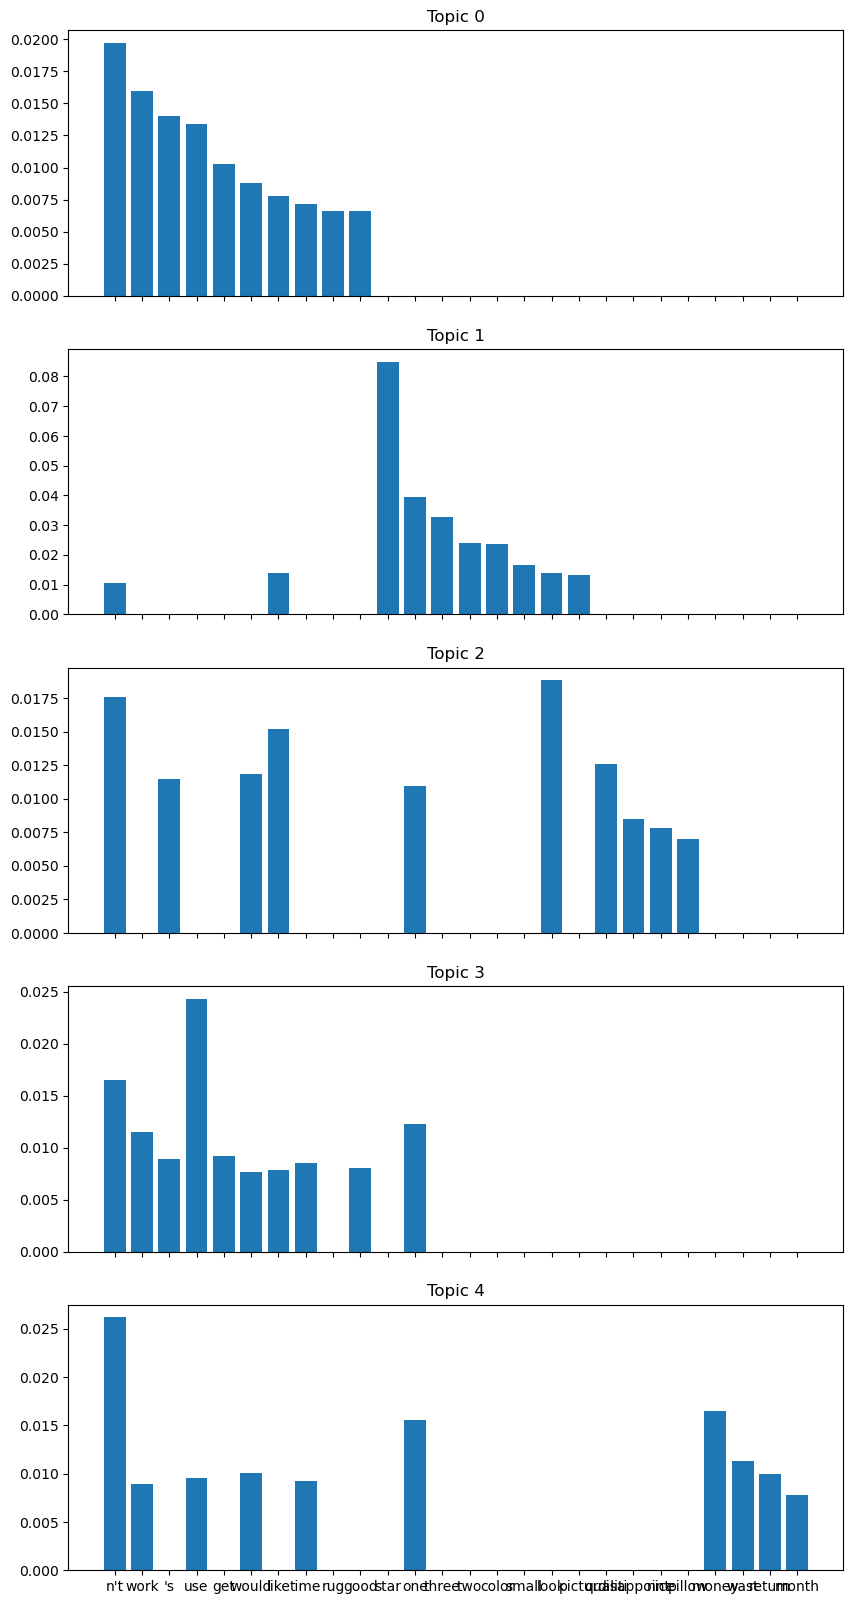

In [80]:
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Create a visualization of the topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# Plot the topics as a bar chart
topics = lda_model.show_topics(num_topics=-1, formatted=False)
fig, axs = plt.subplots(len(topics), 1, figsize=(10, 20), sharex=True)

for i, topic in enumerate(topics):
    topic_words = [word[0] for word in topic[1]]
    topic_weights = [word[1] for word in topic[1]]
    
    axs[i].bar(topic_words, topic_weights)
    axs[i].set_title(f'Topic {i}')
    
plt.show()

In [81]:
import pyLDAvis.gensim_models as gensimvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis_data)

/Users/aarushisinha/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


Improving the model and changing the hyper-parameter

In [82]:
from gensim.models.ldamulticore import LdaMulticore
# Loop over different numbers of topics and alpha and beta priors may help increase the coherence
num_topics = [5, 10, 15]
alpha = [0.01, 0.1, 1]
beta = [0.01, 0.1, 1]

best_coherence = 0
best_lda_model = None

for n in num_topics:
    for a in alpha:
        for b in beta:
            lda_model = LdaMulticore

In [83]:
#Also increasing the num topics
num_topics = 10

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"use" + 0.017*"like" + 0.015*"n't" + 0.012*"would" + 0.012*"'s" + 0.011*"wash" + 0.009*"curtain" + 0.009*"good" + 0.009*"look" + 0.009*"nice"
Topic: 1 
Words: 0.035*"look" + 0.026*"like" + 0.022*"color" + 0.020*"n't" + 0.020*"pictur" + 0.015*"'s" + 0.011*"disappoint" + 0.011*"nice" + 0.010*"one" + 0.009*"order"
Topic: 2 
Words: 0.048*"n't" + 0.027*"money" + 0.023*"work" + 0.023*"wast" + 0.019*"use" + 0.017*"get" + 0.016*"'s" + 0.012*"would" + 0.010*"time" + 0.010*"great"
Topic: 3 
Words: 0.024*"water" + 0.023*"cup" + 0.018*"coffe" + 0.014*"n't" + 0.013*"make" + 0.011*"'s" + 0.010*"use" + 0.010*"hot" + 0.010*"get" + 0.009*"mug"
Topic: 4 
Words: 0.101*"qualiti" + 0.052*"poor" + 0.028*"cheap" + 0.026*"price" + 0.025*"broken" + 0.025*"arriv" + 0.021*"good" + 0.016*"disappoint" + 0.013*"return" + 0.012*"expect"
Topic: 5 
Words: 0.021*"rug" + 0.021*"n't" + 0.020*"lid" + 0.019*"use" + 0.015*"leak" + 0.013*"one" + 0.011*"vacuum" + 0.010*"work" + 0.009*"time" + 0.009*"cle

In [84]:
# Calculate the coherence score of the LDA model
coherence_model_lda = CoherenceModel(model=lda_model, texts=badReviews['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda:.3f}')

Coherence Score: 0.443


Quantitative evaluation of discovered topics

In [92]:
badReviews['topic'] = [sorted(lda_model[corpus][text], key=lambda tup: -1*tup[1])[0][0] for text in range(len(badReviews))]
topic_counts = badReviews.groupby('topic').size()
#topic_counts=badReviews.groupby('topic').sum().sort_values(by='count', ascending=False)
print(topic_counts)

topic
0    6079
1    7024
2    3851
3    3173
4    1979
5    2694
6    4422
7    8553
8     609
9    5489
dtype: int64


/var/folders/tk/8bywnngs745856fd3rn88hqw0000gn/T/ipykernel_45182/474073486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badReviews['topic'] = [sorted(lda_model[corpus][text], key=lambda tup: -1*tup[1])[0][0] for text in range(len(badReviews))]


In [94]:
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis_data)

/Users/aarushisinha/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [95]:
import pickle
#Writing the newer model to the pickle file as it has a slightly higher coherence
with open('topic.model.pkl', 'wb') as f:
    # Write the model to the file using pickle.dump()
    pickle.dump(lda_model, f)